# Predict the credit amount of each customer

SUDIPTA GIRI

## IMPORTING LIBARIES

In [1]:
!pip install missingno

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

#visualizing libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns
import missingno as msno
#for visualizing missing data

## IMPORTING DATASET

In [3]:
data=pd.read_csv(r'Train.csv')

In [4]:
data.head()

,serial number,account_info,duration_month,credit_history,purpose,credit_amount,savings_account,employment_st,poi,personal_status,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,<0,6.0,A34,radio/TV,1169,unknown,A75,4,A93,...,4.0,A121,67.0,A143,A152,2,A173,1,yes,foreigner
1,2,0-199,48.0,A32,radio/TV,5951,<100,A73,2,A92,...,2.0,A121,22.0,A143,A152,1,A173,1,no,foreigner
2,3,unknown,12.0,A34,education,2096,<100,A74,2,A93,...,3.0,A121,49.0,A143,A152,1,A172,2,no,foreigner
3,4,<0,42.0,A32,furniture/equipment,7882,<100,A74,2,A93,...,4.0,A122,45.0,A143,A153,1,A173,2,no,foreigner
4,5,<0,24.0,A33,new_car,4870,<100,A73,3,A93,...,4.0,A124,53.0,A143,A153,2,A173,2,no,foreigner


## EDA AND PRE-PROCESSING OF DATA

In [5]:
data.shape

(800, 21)

In [6]:
data.describe(include='all')

,serial number,account_info,duration_month,credit_history,purpose,credit_amount,savings_account,employment_st,poi,personal_status,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
count,800.0000,800,772.000000,800,800,800.000000,800,800,800.000000,800,...,787.000000,800,767.000000,800,800,800.000000,800,800.000000,800,800
unique,NaN,5,NaN,5,10,NaN,5,5,NaN,4,...,NaN,4,NaN,3,3,NaN,4,NaN,3,3
top,NaN,unknown,NaN,A32,radio/TV,NaN,<100,A73,NaN,A93,...,NaN,A123,NaN,A143,A152,NaN,A173,NaN,no,foreigner
freq,NaN,296,NaN,424,223,NaN,476,275,NaN,437,...,NaN,266,NaN,653,570,NaN,503,NaN,458,745
mean,400.5000,NaN,20.645078,NaN,NaN,3190.976250,NaN,NaN,2.966250,NaN,...,2.822109,NaN,35.423729,NaN,NaN,1.396250,NaN,1.147500,NaN,NaN
std,231.0844,NaN,12.374860,NaN,NaN,2732.671789,NaN,NaN,1.128806,NaN,...,1.105788,NaN,11.714471,NaN,NaN,0.569773,NaN,0.354825,NaN,NaN
min,1.0000,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,...,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,200.7500,NaN,12.000000,NaN,NaN,1342.250000,NaN,NaN,2.000000,NaN,...,2.000000,NaN,26.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,400.5000,NaN,18.000000,NaN,NaN,2281.500000,NaN,NaN,3.000000,NaN,...,3.000000,NaN,32.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,600.2500,NaN,24.000000,NaN,NaN,3914.250000,NaN,NaN,4.000000,NaN,...,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     800 non-null    int64  
 1   account_info      800 non-null    object 
 2   duration_month    772 non-null    float64
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   credit_amount     800 non-null    int64  
 6   savings_account   800 non-null    object 
 7   employment_st     800 non-null    object 
 8   poi               800 non-null    int64  
 9   personal_status   800 non-null    object 
 10  gurantors         800 non-null    object 
 11  resident_since    787 non-null    float64
 12  property_type     800 non-null    object 
 13  age               767 non-null    float64
 14  installment_type  800 non-null    object 
 15  housing_type      800 non-null    object 
 16  credits_no        800 non-null    int64  
 1

In [8]:
data.duplicated().sum()

0

In [9]:
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                                columns=['Column_Name','Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
18,liables,2
20,foreigner,3
15,housing_type,3
14,installment_type,3
19,telephone,3
17,job_type,4
16,credits_no,4
12,property_type,4
11,resident_since,4
10,gurantors,4


In [10]:
data.drop(["serial number"],axis=1,inplace=True)

In [11]:
data.isnull().sum()

account_info         0
duration_month      28
credit_history       0
purpose              0
credit_amount        0
savings_account      0
employment_st        0
poi                  0
personal_status      0
gurantors            0
resident_since      13
property_type        0
age                 33
installment_type     0
housing_type         0
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
dtype: int64

In [12]:
data.isnull().sum()/len(data)*100

account_info        0.000
duration_month      3.500
credit_history      0.000
purpose             0.000
credit_amount       0.000
savings_account     0.000
employment_st       0.000
poi                 0.000
personal_status     0.000
gurantors           0.000
resident_since      1.625
property_type       0.000
age                 4.125
installment_type    0.000
housing_type        0.000
credits_no          0.000
job_type            0.000
liables             0.000
telephone           0.000
foreigner           0.000
dtype: float64

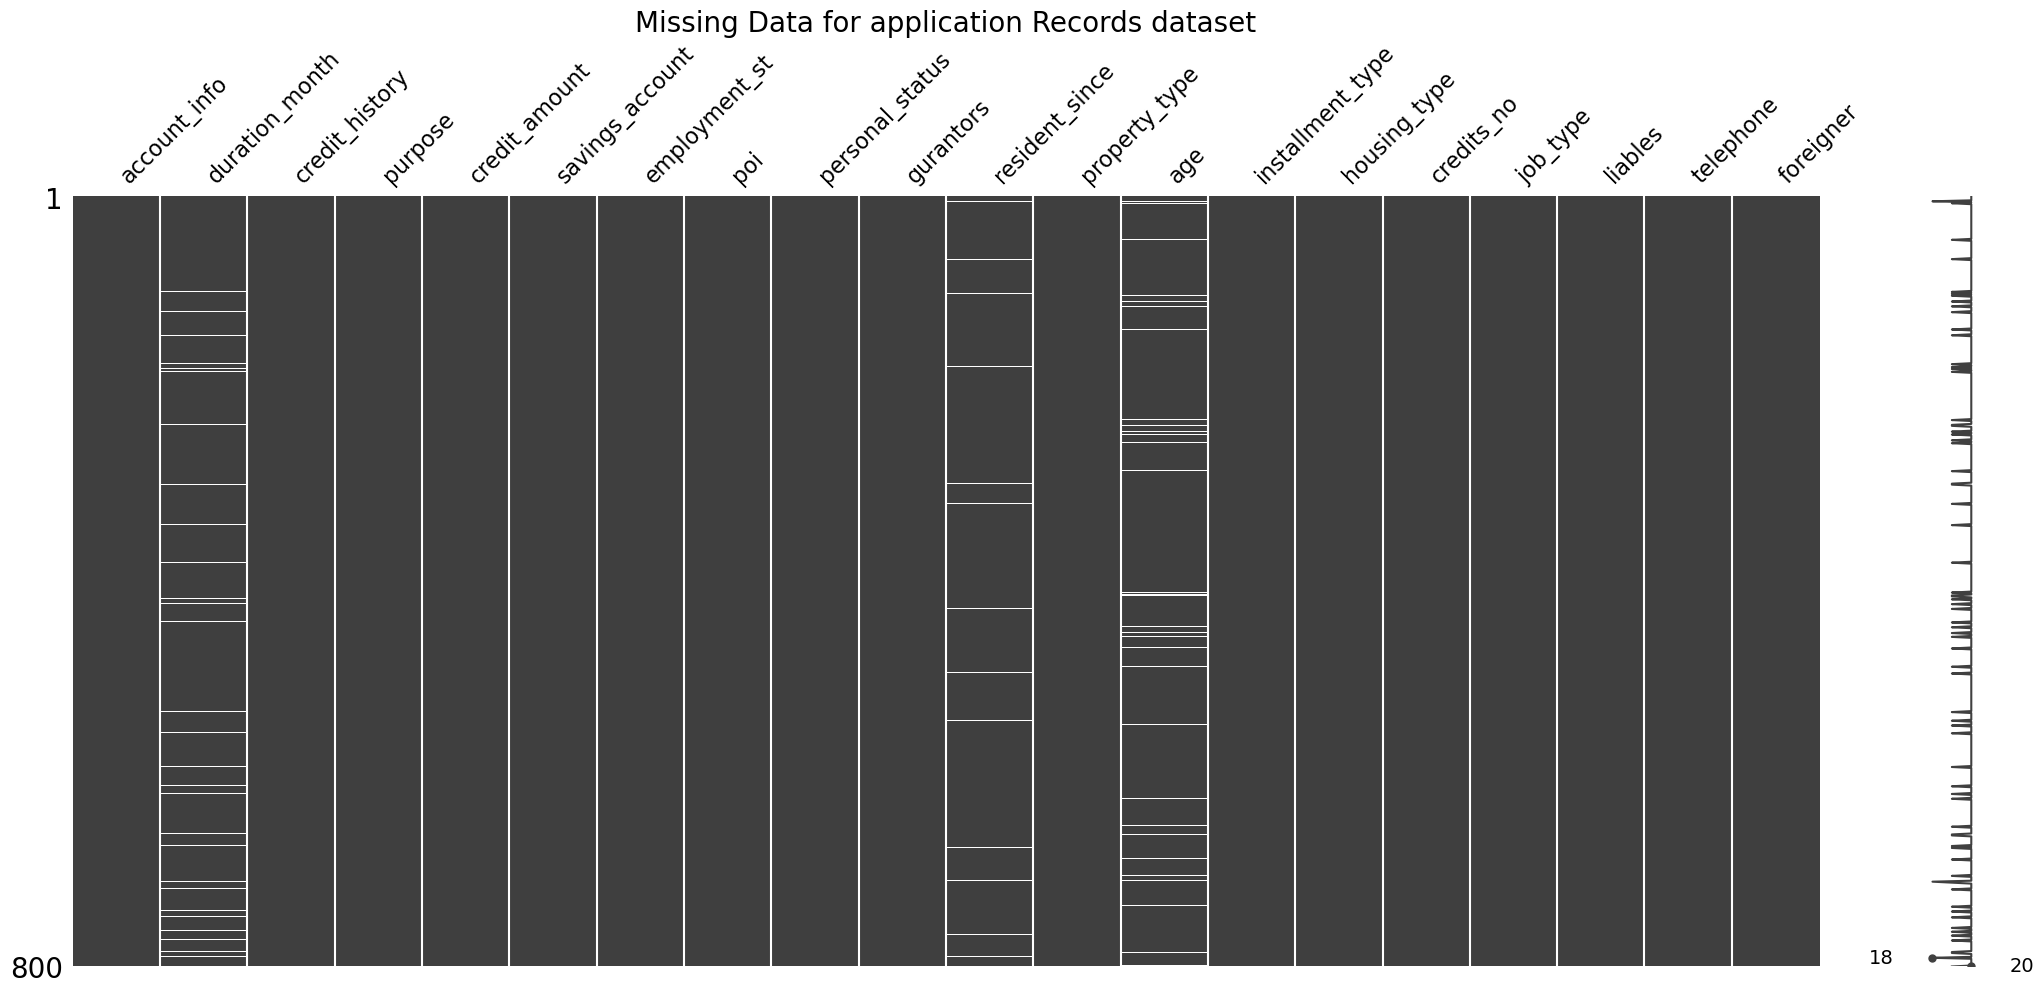

In [13]:
missing =msno.matrix(data)
missing.set_title("Missing Data for application Records dataset",fontsize=20);

In [14]:
for i in data.columns:   # it is used to check unique values of columns
    print({i:data[i].unique()})

{'account_info': array(['<0', '0-199', 'unknown', '?', '>=200'], dtype=object)}
{'duration_month': array([ 6., 48., 12., 42., 24., 36., 30., 15.,  9., 10.,  7., 60., 18.,
       45., 11., 27.,  8., 54., nan, 14., 33., 16.,  4., 47., 13., 22.,
       39., 28.,  5., 26., 72., 40.])}
{'credit_history': array(['A34', 'A32', 'A33', 'A30', 'A31'], dtype=object)}
{'purpose': array(['radio/TV', 'education', 'furniture/equipment', 'new_car',
       'old_car', 'business', 'domestic_appliances', 'repairing', 'other',
       'upskilling'], dtype=object)}
{'credit_amount': array([ 1169,  5951,  2096,  7882,  4870,  9055,  2835,  6948,  3059,
        5234,  1295,  4308,  1567,  1199,  1403,  1282,  2424,  8072,
       12579,  3430,  2134,  2647,  2241,  1804,  2069,  1374,   426,
         409,  2415,  6836,  1913,  4020,  5866,  1264,  1474,  4746,
        6110,  2100,  1225,   458,  2333,  1158,  6204,  6187,  6143,
        1393,  2299,  1352,  7228,  2073,  5965,  1262,  3378,  2225,
         783,

In [15]:
data.replace('?',np.nan,inplace=True)

In [16]:
data.isnull().sum()

account_info        14
duration_month      28
credit_history       0
purpose              0
credit_amount        0
savings_account      0
employment_st        0
poi                  0
personal_status      0
gurantors           24
resident_since      13
property_type        0
age                 33
installment_type     0
housing_type         0
credits_no           0
job_type             0
liables              0
telephone           23
foreigner           28
dtype: int64

In [17]:
data.replace('unknown',np.nan,inplace=True)

In [18]:
data.isnull().sum()

account_info        310
duration_month       28
credit_history        0
purpose               0
credit_amount         0
savings_account     142
employment_st         0
poi                   0
personal_status       0
gurantors            24
resident_since       13
property_type         0
age                  33
installment_type      0
housing_type          0
credits_no            0
job_type              0
liables               0
telephone            23
foreigner            28
dtype: int64

In [19]:
data.isnull().sum()/len(data)*100

account_info        38.750
duration_month       3.500
credit_history       0.000
purpose              0.000
credit_amount        0.000
savings_account     17.750
employment_st        0.000
poi                  0.000
personal_status      0.000
gurantors            3.000
resident_since       1.625
property_type        0.000
age                  4.125
installment_type     0.000
housing_type         0.000
credits_no           0.000
job_type             0.000
liables              0.000
telephone            2.875
foreigner            3.500
dtype: float64

In [20]:
data.drop(["account_info"],axis=1,inplace=True)
data.drop(["savings_account"],axis=1,inplace=True)


In [21]:
data.isnull().sum()/len(data)*100


duration_month      3.500
credit_history      0.000
purpose             0.000
credit_amount       0.000
employment_st       0.000
poi                 0.000
personal_status     0.000
gurantors           3.000
resident_since      1.625
property_type       0.000
age                 4.125
installment_type    0.000
housing_type        0.000
credits_no          0.000
job_type            0.000
liables             0.000
telephone           2.875
foreigner           3.500
dtype: float64

In [22]:
for value in['gurantors','telephone','foreigner']:
    data[value].fillna(data[value].mode()[0],inplace=True)

In [23]:
for value in['duration_month','resident_since','age']:
    data[value].fillna(data[value].mean(),inplace=True)

In [24]:
data.isnull().sum()/len(data)*100


duration_month      0.0
credit_history      0.0
purpose             0.0
credit_amount       0.0
employment_st       0.0
poi                 0.0
personal_status     0.0
gurantors           0.0
resident_since      0.0
property_type       0.0
age                 0.0
installment_type    0.0
housing_type        0.0
credits_no          0.0
job_type            0.0
liables             0.0
telephone           0.0
foreigner           0.0
dtype: float64

In [25]:
data.head()

,duration_month,credit_history,purpose,credit_amount,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,6.0,A34,radio/TV,1169,A75,4,A93,A101,4.0,A121,67.0,A143,A152,2,A173,1,yes,foreigner
1,48.0,A32,radio/TV,5951,A73,2,A92,A101,2.0,A121,22.0,A143,A152,1,A173,1,no,foreigner
2,12.0,A34,education,2096,A74,2,A93,A101,3.0,A121,49.0,A143,A152,1,A172,2,no,foreigner
3,42.0,A32,furniture/equipment,7882,A74,2,A93,A103,4.0,A122,45.0,A143,A153,1,A173,2,no,foreigner
4,24.0,A33,new_car,4870,A73,3,A93,A101,4.0,A124,53.0,A143,A153,2,A173,2,no,foreigner


In [26]:
# Checking unique values from categorical Columns

for i in data.columns[(data.dtypes == "object").values].tolist():
    print(i, '\n')
    print(data[i].value_counts())
    print('-----------------------------------------------------')

credit_history 

credit_history
A32    424
A34    235
A33     71
A31     37
A30     33
Name: count, dtype: int64
-----------------------------------------------------
purpose 

purpose
radio/TV               223
new_car                184
furniture/equipment    144
old_car                 81
business                77
education               45
repairing               19
other                   10
domestic_appliances      9
upskilling               8
Name: count, dtype: int64
-----------------------------------------------------
employment_st 

employment_st
A73    275
A75    203
A74    141
A72    133
A71     48
Name: count, dtype: int64
-----------------------------------------------------
personal_status 

personal_status
A93    437
A92    255
A94     70
A91     38
Name: count, dtype: int64
-----------------------------------------------------
gurantors 

gurantors
A101    728
A103     42
A102     30
Name: count, dtype: int64
-----------------------------------------------------
prop

In [27]:
data.shape

(800, 18)

## VISUALIZING THE DATASET

<Axes: >

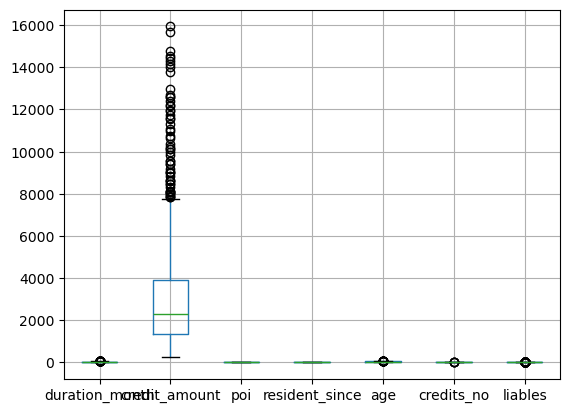

In [28]:
data.boxplot()

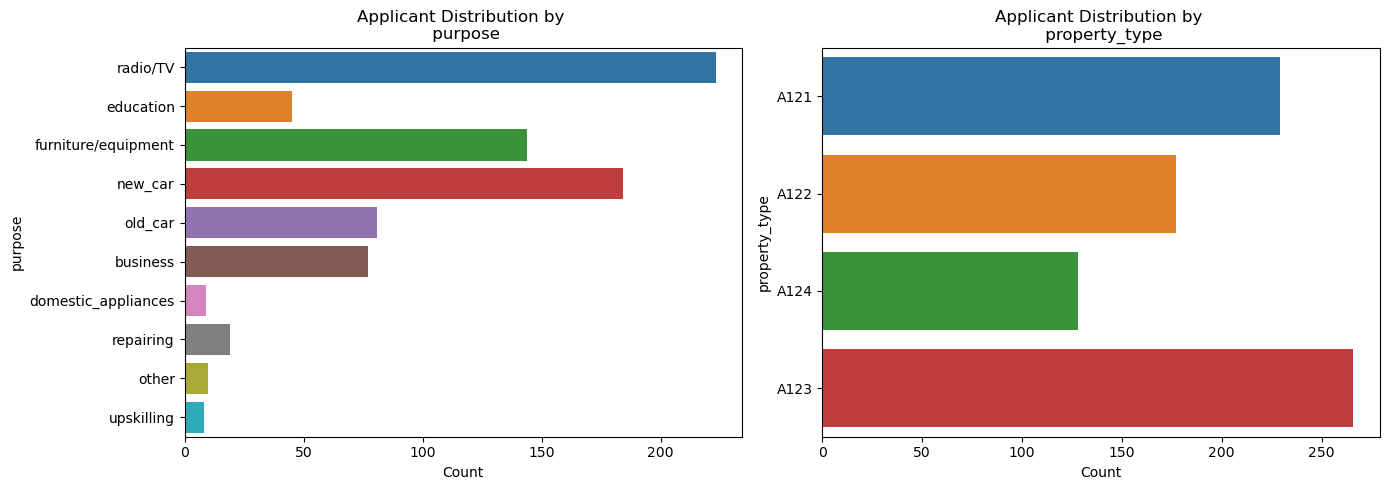

In [29]:
fig, axes = plt.subplots(1,2)

g1=sns.countplot(y=data.purpose,linewidth=1.2, ax=axes[0])
g1.set_title("Applicant Distribution by \n purpose")
g1.set_xlabel("Count")

g2=sns.countplot(y=data.property_type,linewidth=1.2, ax=axes[1])
g2.set_title("Applicant Distribution by \n property_type")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()


plt.show()



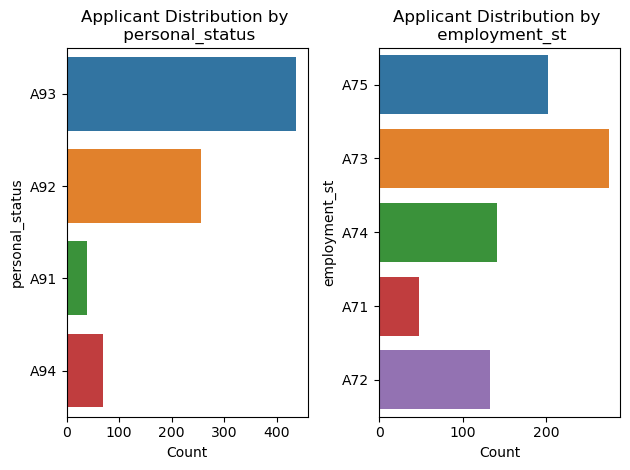

In [30]:
ig, axes = plt.subplots(1,2)

g1=sns.countplot(y=data.personal_status,linewidth=1.2, ax=axes[0])
g1.set_title("Applicant Distribution by \n personal_status")
g1.set_xlabel("Count")

g2=sns.countplot(y=data.employment_st,linewidth=1.2, ax=axes[1])
g2.set_title("Applicant Distribution by \n employment_st")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()


plt.show()

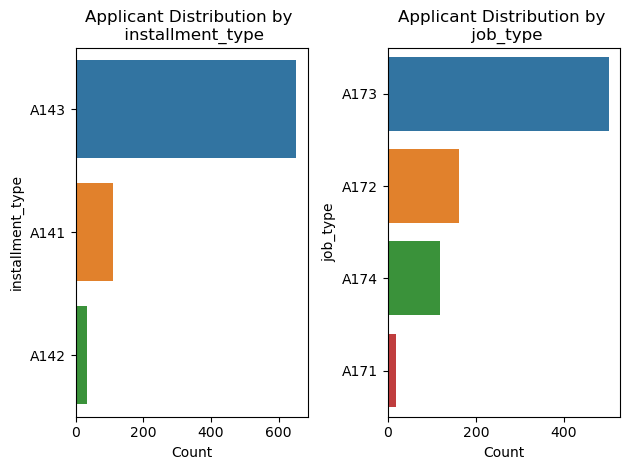

In [31]:
ig, axes = plt.subplots(1,2)

g1=sns.countplot(y=data.installment_type,linewidth=1.2, ax=axes[0])
g1.set_title("Applicant Distribution by \n installment_type")
g1.set_xlabel("Count")

g2=sns.countplot(y=data.job_type,linewidth=1.2, ax=axes[1])
g2.set_title("Applicant Distribution by \n job_type")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()


plt.show()

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_month    800 non-null    float64
 1   credit_history    800 non-null    object 
 2   purpose           800 non-null    object 
 3   credit_amount     800 non-null    int64  
 4   employment_st     800 non-null    object 
 5   poi               800 non-null    int64  
 6   personal_status   800 non-null    object 
 7   gurantors         800 non-null    object 
 8   resident_since    800 non-null    float64
 9   property_type     800 non-null    object 
 10  age               800 non-null    float64
 11  installment_type  800 non-null    object 
 12  housing_type      800 non-null    object 
 13  credits_no        800 non-null    int64  
 14  job_type          800 non-null    object 
 15  liables           800 non-null    int64  
 16  telephone         800 non-null    object 
 1

## CONVERTING INTO NUMERICAL VARIABLE

In [33]:
colname =['duration_month', 'credit_history', 'purpose',
       'employment_st', 'poi', 'personal_status', 'gurantors',
       'resident_since', 'property_type', 'age', 'installment_type',
       'housing_type', 'credits_no', 'job_type', 'liables', 'telephone',
       'foreigner']

In [34]:
colname

['duration_month',
 'credit_history',
 'purpose',
 'employment_st',
 'poi',
 'personal_status',
 'gurantors',
 'resident_since',
 'property_type',
 'age',
 'installment_type',
 'housing_type',
 'credits_no',
 'job_type',
 'liables',
 'telephone',
 'foreigner']

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in colname:
    data[x]=le.fit_transform(data[x])
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    print('Feature',x)
    print('mapping',le_name_mapping)

Feature duration_month
mapping {4.0: 0, 5.0: 1, 6.0: 2, 7.0: 3, 8.0: 4, 9.0: 5, 10.0: 6, 11.0: 7, 12.0: 8, 13.0: 9, 14.0: 10, 15.0: 11, 16.0: 12, 18.0: 13, 20.645077720207254: 14, 22.0: 15, 24.0: 16, 26.0: 17, 27.0: 18, 28.0: 19, 30.0: 20, 33.0: 21, 36.0: 22, 39.0: 23, 40.0: 24, 42.0: 25, 45.0: 26, 47.0: 27, 48.0: 28, 54.0: 29, 60.0: 30, 72.0: 31}
Feature credit_history
mapping {'A30': 0, 'A31': 1, 'A32': 2, 'A33': 3, 'A34': 4}
Feature purpose
mapping {'business': 0, 'domestic_appliances': 1, 'education': 2, 'furniture/equipment': 3, 'new_car': 4, 'old_car': 5, 'other': 6, 'radio/TV': 7, 'repairing': 8, 'upskilling': 9}
Feature employment_st
mapping {'A71': 0, 'A72': 1, 'A73': 2, 'A74': 3, 'A75': 4}
Feature poi
mapping {1: 0, 2: 1, 3: 2, 4: 3}
Feature personal_status
mapping {'A91': 0, 'A92': 1, 'A93': 2, 'A94': 3}
Feature gurantors
mapping {'A101': 0, 'A102': 1, 'A103': 2}
Feature resident_since
mapping {1.0: 0, 2.0: 1, 2.8221092757306225: 2, 3.0: 3, 4.0: 4}
Feature property_type
mapp

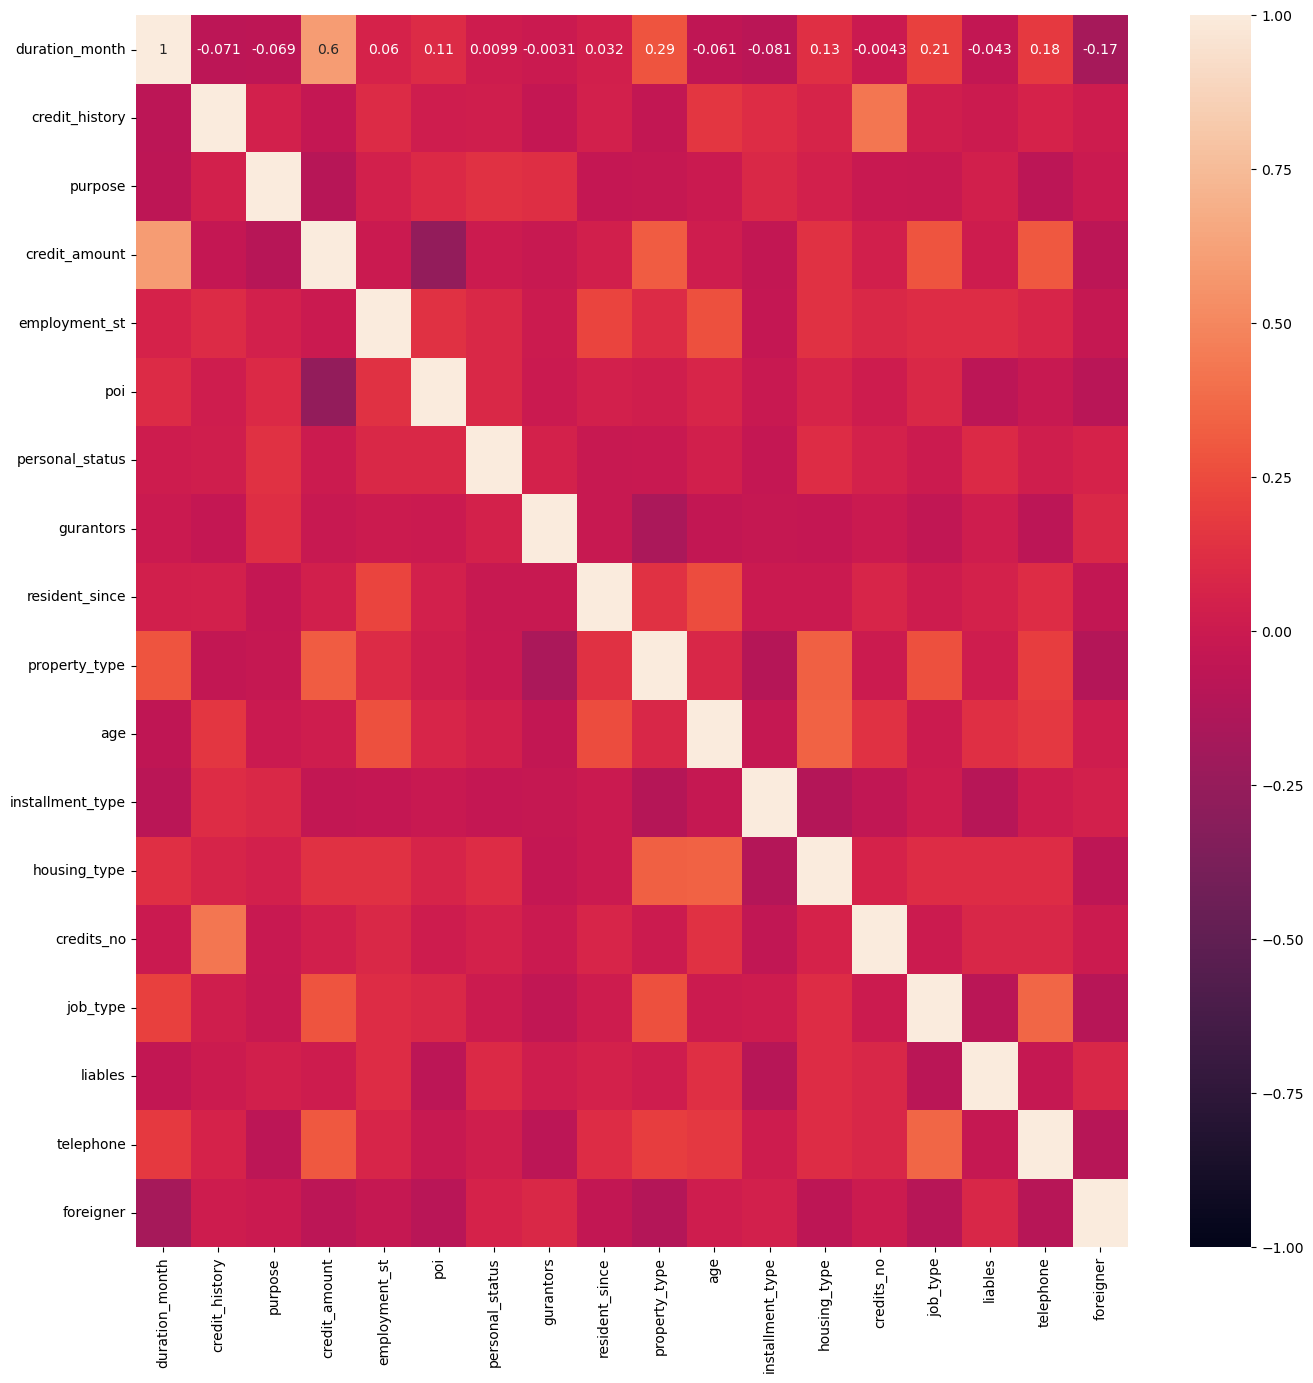

In [36]:
#multicollinearity is the relationship amongst the multiple independent variables
corr_df=data.corr(method="pearson")
#print(corr_df)
plt.figure(figsize=(16, 16))
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [37]:
data.head()

,duration_month,credit_history,purpose,credit_amount,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,2,4,7,1169,4,3,2,0,4,0,48,2,1,1,2,0,1,0
1,28,2,7,5951,2,1,1,0,1,0,3,2,1,0,2,0,0,0
2,8,4,2,2096,3,1,2,0,3,0,30,2,1,0,1,1,0,0
3,25,2,3,7882,3,1,2,2,4,1,26,2,2,0,2,1,0,0
4,16,3,4,4870,2,2,2,0,4,3,34,2,2,1,2,1,0,0


In [38]:
data.drop(["foreigner"],axis=1,inplace=True)

## SPLITING THE DATA FOR MODEL BUILDING

In [39]:
data.shape

(800, 17)

In [40]:
Y = data.values[:,3]

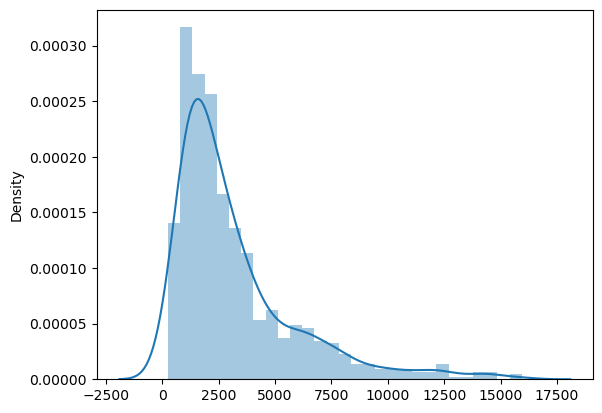

In [41]:
sns.distplot(Y)
plt.show()

In [42]:
Y_log = np.log(Y)

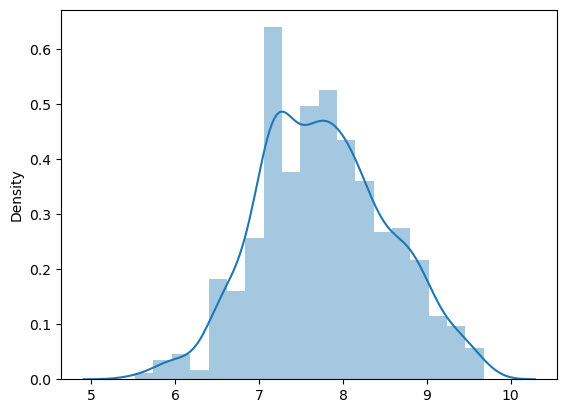

In [43]:
 sns.distplot(Y_log)
 plt.show()

In [44]:
print(Y_log)

[7.06390396 8.69131455 7.64778605 8.97233696 8.49084922 9.11107237
 7.94979722 8.84620913 8.02584334 8.56293108 7.16626597 8.36822904
 7.35691824 7.08924316 7.24636808 7.15617664 7.79317435 8.99615656
 9.43978404 8.14031554 7.66575343 7.8811822  7.71467747 7.4977617
 7.63482068 7.22548147 6.05443935 6.01371516 7.78945457 8.82995804
 7.55642797 8.29903718 8.67692825 7.14203657 7.29573507 8.46505744
 8.71768205 7.64969262 7.11069612 6.12686918 7.75491027 7.05444966
 8.73294952 8.7302056  8.7230685  7.23921497 7.74022952 7.20934026
 8.88571765 7.63675211 7.75491027 8.69366433 7.14045304 8.1250391
 7.70751219 6.6631327  8.77462222 9.16597042 7.58120983 8.73697109
 7.23777819 7.33758774 7.57712193 9.57644076 8.06495089 8.55448898
 7.68294317 6.91473089 7.50604218 7.78072089 9.00368514 6.59304453
 7.05961763 8.69181854 7.58933582 7.33040521 8.28526113 8.47031121
 9.15228744 8.25114214 8.68996934 7.10085191 7.3575562  7.47022414
 7.74716497 7.25276242 7.16626597 9.44240402 7.71824095 7.010311

In [45]:
X = data.values[:,(0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16)]

In [46]:
#print(X)

In [47]:
print(X.shape)
print(Y_log.shape)

(800, 16)
(800,)


## SCALING THE DATASET

In [48]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

scaler.fit(X)
X= scaler.transform(X)

## CONVERTING AND SPLITING THE DATA INTO TEST AND TRAIN

In [49]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size=0.2,
                                                    random_state=10) 

In [50]:
#1 predicting using the DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

model_DecisionTree=DecisionTreeRegressor(criterion="squared_error",random_state=10)
model_DecisionTree.fit(X_train,Y_train)
#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)

In [51]:
model_DecisionTree.score(X_train, Y_train)

0.999918783733992

In [52]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.2707015335605977
RMSE: 0.6991770290078249
Adj R-square: 0.25579888290538644


In [53]:
#2 predicting using the DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

model_DecisionTree=DecisionTreeRegressor(max_depth=5,min_samples_leaf=5,
                                         random_state=10)
model_DecisionTree.fit(X_train,Y_train)
#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)

In [54]:
model_DecisionTree.score(X_train, Y_train)

0.6077060940671781

In [55]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.599528080318338
RMSE: 0.5181082837481613
Adj R-square: 0.5913447460719694


In [56]:
print(list(zip(data.columns,model_DecisionTree.feature_importances_)))

[('duration_month', 0.6774773861080975), ('credit_history', 0.0037751217180966128), ('purpose', 0.011247566435425203), ('credit_amount', 0.0014353109072229298), ('employment_st', 0.1705915689092402), ('poi', 0.0), ('personal_status', 0.0), ('gurantors', 0.020793000911746733), ('resident_since', 0.027729003169709786), ('property_type', 0.0), ('age', 0.0), ('installment_type', 0.008028962571561776), ('housing_type', 0.004004384771574861), ('credits_no', 0.060657503749391155), ('job_type', 0.0), ('liables', 0.014260190747933275)]


In [57]:
#3 predicting using the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

model_DecisionTree=RandomForestRegressor(n_estimators=100,random_state=10)
model_DecisionTree.fit(X_train,Y_train)
#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)

In [58]:
model_DecisionTree.score(X_train, Y_train)

0.9338670583983432

In [59]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6226565907016853
RMSE: 0.5029246075921427
Adj R-square: 0.6149458696943124


In [60]:
#4 predicting using the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

model_DecisionTree=RandomForestRegressor(n_estimators=100,random_state=10,
                                        max_depth=5,min_samples_leaf=5)
model_DecisionTree.fit(X_train,Y_train)
#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)

In [61]:
model_DecisionTree.score(X_train, Y_train)

0.6597784391023286

In [62]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6530381414963322
RMSE: 0.48225347857274226
Adj R-square: 0.6459482440045586


In [63]:
print(list(zip(data.columns,model_DecisionTree.feature_importances_)))

[('duration_month', 0.6354615460887584), ('credit_history', 0.008134988046699824), ('purpose', 0.01658687708324602), ('credit_amount', 0.008258235605387798), ('employment_st', 0.1718362710967859), ('poi', 0.01364103485023823), ('personal_status', 0.0007212156103924058), ('gurantors', 0.010440342432545347), ('resident_since', 0.024485291051362882), ('property_type', 0.02116376998613457), ('age', 0.004423084227216468), ('installment_type', 0.0036114526712905273), ('housing_type', 0.004950704452590877), ('credits_no', 0.0436880139967348), ('job_type', 0.0015119304634014748), ('liables', 0.031085242337214433)]


In [64]:
#5 predicting using the ExtratreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

model_DecisionTree=ExtraTreesRegressor(n_estimators=100,random_state=10, bootstrap=True,
                                      max_depth=5, min_samples_leaf=5)
                                       
model_DecisionTree.fit(X_train,Y_train)
#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)

In [65]:
model_DecisionTree.score(X_train, Y_train)

0.6187267860360279

In [66]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6398005098018359
RMSE: 0.49136707021177084
Adj R-square: 0.6324401115346959


In [67]:
#6 predicting using the KNeighbors_Regressor
from sklearn.neighbors import KNeighborsRegressor
model_KNN=KNeighborsRegressor(n_neighbors=int(np.sqrt(len(Y_train))), metric='euclidean')
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)

In [68]:
int(np.sqrt(len(Y_train)))

25

In [69]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.40362424181794754
RMSE: 0.6322582313015414
Adj R-square: 0.39143776400068975


In [70]:
#7 predicting using the Support vector
from sklearn.svm import SVR
model_SVR=SVR(kernel="rbf",gamma=0.1,C=1)
#fit the model on the data and predict the values
model_SVR.fit(X_train,Y_train)
Y_pred=model_SVR.predict(X_test)

In [71]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.5514547783972887
RMSE: 0.5483244585750893
Adj R-square: 0.5422891033709243


In [72]:
#8 predicting using the LinearRegression
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

#predict using the model
Y_pred=lm.predict(X_test)

7.776695907389058
[ 4.49658719e-01  4.96101384e-04 -3.04380683e-02 -2.46202620e-02
 -2.87955845e-01  1.45036061e-02  1.51639094e-04 -2.52463307e-02
  9.52990346e-02  3.19349221e-02  4.44945628e-02 -2.09424213e-02
  9.54304386e-03  1.08252239e-01  4.14474226e-02  8.09534279e-02]


In [73]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6800181237509866
RMSE: 0.46312389759421235
Adj R-square: 0.673479541349985


In [74]:
#9 predicting using the AdaBoost_Regressor
from sklearn.ensemble import AdaBoostRegressor
model_AdaBoost=AdaBoostRegressor(n_estimators=100,
                              random_state=10)

#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)

Y_pred=model_AdaBoost.predict(X_test)

In [75]:
model_AdaBoost.score(X_train, Y_train)

0.609924331159148

In [76]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.5635849534768507
RMSE: 0.5408593713497998
Adj R-square: 0.5546671492056241


In [77]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [78]:
#9 predicting using the XGBRegressor
from xgboost import XGBRegressor
model_XGBoost=XGBRegressor(n_estimators=10000,
                              random_state=10)

#fit the model on the data and predict the values
model_XGBoost.fit(X_train,Y_train)

Y_pred=model_XGBoost.predict(X_test)

In [79]:
model_XGBoost.score(X_train, Y_train)

0.9999035997286991

In [80]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.5370457908928761
RMSE: 0.5570619816249194
Adj R-square: 0.52758567934024


In [81]:
data.head()

,duration_month,credit_history,purpose,credit_amount,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone
0,2,4,7,1169,4,3,2,0,4,0,48,2,1,1,2,0,1
1,28,2,7,5951,2,1,1,0,1,0,3,2,1,0,2,0,0
2,8,4,2,2096,3,1,2,0,3,0,30,2,1,0,1,1,0
3,25,2,3,7882,3,1,2,2,4,1,26,2,2,0,2,1,0
4,16,3,4,4870,2,2,2,0,4,3,34,2,2,1,2,1,0


# WORKING ON TESTING DATASET

## IMPORTING TEST DATASET

In [82]:
test=pd.read_csv(r'Test.csv')

In [83]:
test.head()

,serial number,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,unknown,24.0,A34,education,<100,A75,4,A93,A101,4.0,A124,54.0,A143,A153,2,A173,2,no,foreigner
1,2,0-199,18.0,A34,radio/TV,<100,A75,3,A92,A103,4.0,A121,48.0,A141,A151,2,A172,1,yes,foreigner
2,3,<0,NaN,A34,furniture/equipment,<100,A75,1,A92,A101,4.0,A122,24.0,A143,A152,2,A173,1,no,foreigner
3,4,unknown,12.0,A34,radio/TV,unknown,A75,4,A93,A101,NaN,A123,35.0,A143,A152,2,A173,1,no,foreigner
4,5,0-199,12.0,A32,new_car,unknown,A71,1,A92,A101,2.0,A121,24.0,A143,A151,1,A171,1,no,foreigner


In [84]:
test.shape

(200, 20)

## EDA AND PRE-PROCESSING THE DATA

In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     200 non-null    int64  
 1   account_info      200 non-null    object 
 2   duration_month    190 non-null    float64
 3   credit_history    200 non-null    object 
 4   purpose           200 non-null    object 
 5   savings_account   200 non-null    object 
 6   employment_st     200 non-null    object 
 7   poi               200 non-null    int64  
 8   personal_status   200 non-null    object 
 9   gurantors         200 non-null    object 
 10  resident_since    194 non-null    float64
 11  property_type     200 non-null    object 
 12  age               194 non-null    float64
 13  installment_type  200 non-null    object 
 14  housing_type      200 non-null    object 
 15  credits_no        200 non-null    int64  
 16  job_type          200 non-null    object 
 1

In [86]:
test.duplicated().sum()

0

In [87]:
test.drop(["serial number"],axis=1,inplace=True)

In [88]:
test.isnull().sum()

account_info         0
duration_month      10
credit_history       0
purpose              0
savings_account      0
employment_st        0
poi                  0
personal_status      0
gurantors            0
resident_since       6
property_type        0
age                  6
installment_type     0
housing_type         0
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
dtype: int64

In [89]:
test.isnull().sum()/len(data)*100

account_info        0.00
duration_month      1.25
credit_history      0.00
purpose             0.00
savings_account     0.00
employment_st       0.00
poi                 0.00
personal_status     0.00
gurantors           0.00
resident_since      0.75
property_type       0.00
age                 0.75
installment_type    0.00
housing_type        0.00
credits_no          0.00
job_type            0.00
liables             0.00
telephone           0.00
foreigner           0.00
dtype: float64

In [90]:
test.replace('?',np.nan,inplace=True)

In [91]:
test.isnull().sum()

account_info         9
duration_month      10
credit_history       0
purpose              0
savings_account      0
employment_st        0
poi                  0
personal_status      0
gurantors            7
resident_since       6
property_type        0
age                  6
installment_type     0
housing_type         0
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            9
dtype: int64

In [92]:
test.replace('unknown',np.nan,inplace=True)

In [93]:
test.isnull().sum()

account_info        84
duration_month      10
credit_history       0
purpose              0
savings_account     41
employment_st        0
poi                  0
personal_status      0
gurantors            7
resident_since       6
property_type        0
age                  6
installment_type     0
housing_type         0
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            9
dtype: int64

In [94]:
test.isnull().sum()/len(data)*100

account_info        10.500
duration_month       1.250
credit_history       0.000
purpose              0.000
savings_account      5.125
employment_st        0.000
poi                  0.000
personal_status      0.000
gurantors            0.875
resident_since       0.750
property_type        0.000
age                  0.750
installment_type     0.000
housing_type         0.000
credits_no           0.000
job_type             0.000
liables              0.000
telephone            0.000
foreigner            1.125
dtype: float64

In [95]:
test.drop(["account_info"],axis=1,inplace=True)
test.drop(["savings_account"],axis=1,inplace=True)

In [96]:
test.isnull().sum()/len(data)*100

duration_month      1.250
credit_history      0.000
purpose             0.000
employment_st       0.000
poi                 0.000
personal_status     0.000
gurantors           0.875
resident_since      0.750
property_type       0.000
age                 0.750
installment_type    0.000
housing_type        0.000
credits_no          0.000
job_type            0.000
liables             0.000
telephone           0.000
foreigner           1.125
dtype: float64

In [97]:
for value in['duration_month','gurantors','resident_since','age','telephone','foreigner']:
    test[value].fillna(test[value].mode()[0],inplace=True)

In [98]:
test.isnull().sum()/len(data)*100

duration_month      0.0
credit_history      0.0
purpose             0.0
employment_st       0.0
poi                 0.0
personal_status     0.0
gurantors           0.0
resident_since      0.0
property_type       0.0
age                 0.0
installment_type    0.0
housing_type        0.0
credits_no          0.0
job_type            0.0
liables             0.0
telephone           0.0
foreigner           0.0
dtype: float64

In [99]:
test.head()

,duration_month,credit_history,purpose,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,24.0,A34,education,A75,4,A93,A101,4.0,A124,54.0,A143,A153,2,A173,2,no,foreigner
1,18.0,A34,radio/TV,A75,3,A92,A103,4.0,A121,48.0,A141,A151,2,A172,1,yes,foreigner
2,24.0,A34,furniture/equipment,A75,1,A92,A101,4.0,A122,24.0,A143,A152,2,A173,1,no,foreigner
3,12.0,A34,radio/TV,A75,4,A93,A101,4.0,A123,35.0,A143,A152,2,A173,1,no,foreigner
4,12.0,A32,new_car,A71,1,A92,A101,2.0,A121,24.0,A143,A151,1,A171,1,no,foreigner


In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_month    200 non-null    float64
 1   credit_history    200 non-null    object 
 2   purpose           200 non-null    object 
 3   employment_st     200 non-null    object 
 4   poi               200 non-null    int64  
 5   personal_status   200 non-null    object 
 6   gurantors         200 non-null    object 
 7   resident_since    200 non-null    float64
 8   property_type     200 non-null    object 
 9   age               200 non-null    float64
 10  installment_type  200 non-null    object 
 11  housing_type      200 non-null    object 
 12  credits_no        200 non-null    int64  
 13  job_type          200 non-null    object 
 14  liables           200 non-null    int64  
 15  telephone         200 non-null    object 
 16  foreigner         200 non-null    object 
dt

## CONVERTING INTO NUMERICAL VARIABLE

In [101]:
colname =['duration_month', 'credit_history', 'purpose',
       'employment_st', 'poi', 'personal_status', 'gurantors',
       'resident_since', 'property_type', 'age', 'installment_type',
       'housing_type', 'credits_no', 'job_type', 'liables', 'telephone',
       'foreigner']

In [102]:
colname

['duration_month',
 'credit_history',
 'purpose',
 'employment_st',
 'poi',
 'personal_status',
 'gurantors',
 'resident_since',
 'property_type',
 'age',
 'installment_type',
 'housing_type',
 'credits_no',
 'job_type',
 'liables',
 'telephone',
 'foreigner']

## SCALING THE TEST DATASET

In [103]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in colname:
    test[x]=le.fit_transform(test[x])
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    print('Feature',x)
    print('mapping',le_name_mapping)

Feature duration_month
mapping {4.0: 0, 6.0: 1, 8.0: 2, 9.0: 3, 10.0: 4, 11.0: 5, 12.0: 6, 13.0: 7, 15.0: 8, 16.0: 9, 18.0: 10, 24.0: 11, 27.0: 12, 28.0: 13, 30.0: 14, 36.0: 15, 42.0: 16, 45.0: 17, 48.0: 18, 60.0: 19}
Feature credit_history
mapping {'A30': 0, 'A31': 1, 'A32': 2, 'A33': 3, 'A34': 4}
Feature purpose
mapping {'business': 0, 'domestic_appliances': 1, 'education': 2, 'furniture/equipment': 3, 'new_car': 4, 'old_car': 5, 'other': 6, 'radio/TV': 7, 'repairing': 8, 'upskilling': 9}
Feature employment_st
mapping {'A71': 0, 'A72': 1, 'A73': 2, 'A74': 3, 'A75': 4}
Feature poi
mapping {1: 0, 2: 1, 3: 2, 4: 3}
Feature personal_status
mapping {'A91': 0, 'A92': 1, 'A93': 2, 'A94': 3}
Feature gurantors
mapping {'A101': 0, 'A102': 1, 'A103': 2}
Feature resident_since
mapping {1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3}
Feature property_type
mapping {'A121': 0, 'A122': 1, 'A123': 2, 'A124': 3}
Feature age
mapping {20.0: 0, 21.0: 1, 22.0: 2, 23.0: 3, 24.0: 4, 25.0: 5, 26.0: 6, 27.0: 7, 28.0: 8, 29.0

In [104]:
test.drop(["foreigner"],axis=1,inplace=True)

In [105]:
test.head()

,duration_month,credit_history,purpose,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone
0,11,4,2,4,3,2,0,3,3,31,2,2,1,2,1,0
1,10,4,7,4,2,1,2,3,0,27,0,0,1,1,0,1
2,11,4,3,4,0,1,0,3,1,4,2,1,1,2,0,0
3,6,4,7,4,3,2,0,3,2,15,2,1,1,2,0,0
4,6,2,4,0,0,1,0,1,0,4,2,0,0,0,0,0


## IMPLEMENTING THE BEST ALGORITHM TO TEST DATA

In [106]:
X_test_new = test.values

In [107]:
print(X_test_new.shape)

(200, 16)


In [108]:
X_test_new=scaler.transform(X_test_new)

In [109]:
print(X_test_new)

[[-0.29075954  1.33983761 -1.05292946 ...  0.14555648  2.40409256
  -0.81437194]
 [-0.43037997  1.33983761  1.14410645 ... -1.38661701 -0.41595736
   1.22794014]
 [-0.29075954  1.33983761 -0.61352228 ...  0.14555648 -0.41595736
  -0.81437194]
 ...
 [-0.98886168 -0.50503346  1.14410645 ...  0.14555648 -0.41595736
  -0.81437194]
 [ 0.54696302 -0.50503346  1.14410645 ...  0.14555648 -0.41595736
   1.22794014]
 [ 0.54696302  1.33983761  0.26529209 ...  0.14555648 -0.41595736
  -0.81437194]]


In [110]:
# predicting using the LinearRegression
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

#predict using the model
Y_pred=lm.predict(X_test_new)
#print(Y_pred)

7.776695907389058
[ 4.49658719e-01  4.96101384e-04 -3.04380683e-02 -2.46202620e-02
 -2.87955845e-01  1.45036061e-02  1.51639094e-04 -2.52463307e-02
  9.52990346e-02  3.19349221e-02  4.44945628e-02 -2.09424213e-02
  9.54304386e-03  1.08252239e-01  4.14474226e-02  8.09534279e-02]


In [111]:
print(Y_pred)

[7.60458979 7.26452457 8.00309051 7.01141665 7.3903374  8.31292475
 6.66268261 6.93266111 8.83161409 7.27777942 7.16647186 6.50191535
 7.75813596 8.16863672 8.00329349 8.15700373 7.40474246 7.66920191
 8.32534522 6.99181622 7.36314863 7.32842127 8.07026078 6.48574136
 7.95498964 7.55364245 7.95779898 7.97249122 7.92223771 8.22061776
 7.79661423 7.51295262 8.32678283 7.97963664 7.31315318 6.99849476
 7.00709396 7.27024539 7.48937489 7.21093469 7.55845011 7.25204118
 7.05887569 7.50003247 7.42917024 8.07370715 7.96289814 7.26303872
 6.9576586  6.6357512  7.27808854 7.72299357 7.39389133 7.31494379
 8.46652568 7.42623251 6.94412828 7.44333938 7.52599107 7.63653893
 7.22328404 7.57875395 7.33409134 7.40075138 7.04526229 7.70080287
 7.24880375 7.42267805 7.86974452 6.9450624  8.31637785 7.46866595
 7.44835002 7.07832031 7.47579193 7.02031919 7.79762133 7.57148452
 7.55397006 7.9513568  7.96318292 8.09410566 7.35439022 7.05963342
 7.79667726 7.05374838 7.82492888 8.5562867  7.94495742 7.8207

In [112]:
credit_amount = np.expm1(Y_pred)

In [113]:
print(credit_amount)

[2006.3882775  1427.70621332 2989.18490817 1108.22477685 1619.25270178
 4075.21747855  781.64766315 1024.21857037 6846.33013693 1446.76956959
 1294.26664407  665.41683405 2339.53768886 3527.53030406 2989.79192116
 3486.72078304 1642.76145019 2140.37175098 4126.16173324 1086.69517348
 1575.79349692 1521.97550667 3196.93568979  654.7249141  2848.75880174
 1906.67871454 2856.77599339 2899.07307861 2756.93559638 3715.79776718
 2431.35264001 1830.61362053 4132.09924517 2919.869532   1498.89918713
 1093.98369913 1103.44029023 1435.90300495 1787.93345362 1353.15739724
 1915.87226286 1409.98197306 1162.13670398 1807.10112939 1683.40933353
 3207.97596754 2871.38548509 1425.58494423 1050.16946899  760.85115476
 1447.21717281 2258.71407055 1625.02119739 1501.58732945 4751.97340739
 1678.46826315 1036.04259407 1707.44585319 1854.65138803 2071.55811956
 1369.98404203 1955.18994339 1530.63541872 1636.21413983 1146.40975584
 2209.121718   1405.42141444 1672.50925744 2615.89692955 1037.0117645
 4089.3

## SAVING THE OUTPUT IN CSV FILE

In [114]:
test["credit_amount"]=credit_amount
test.to_csv("output_credit_predictions.csv", header=True, index=False)

In [115]:
test.head()

,duration_month,credit_history,purpose,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,credit_amount
0,11,4,2,4,3,2,0,3,3,31,2,2,1,2,1,0,2006.388277
1,10,4,7,4,2,1,2,3,0,27,0,0,1,1,0,1,1427.706213
2,11,4,3,4,0,1,0,3,1,4,2,1,1,2,0,0,2989.184908
3,6,4,7,4,3,2,0,3,2,15,2,1,1,2,0,0,1108.224777
4,6,2,4,0,0,1,0,1,0,4,2,0,0,0,0,0,1619.252702


In [116]:
test_output=test[("credit_amount")]

In [117]:
test_output.head()

0    2006.388277
1    1427.706213
2    2989.184908
3    1108.224777
4    1619.252702
Name: credit_amount, dtype: float64

In [118]:
test_output.to_csv("output_credit_predictions.csv", header=True, index=False)